# Estadistica Aplicada

Sesion 19, 18 de Octubre

Jesus Adrian Cordero Hernandez 1952778

GPO 41

In [1]:
## 1-Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
# Estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA
## pmdarima
import pmdarima as pm

In [4]:
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month',parse_dates=True)
pasajeros

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
pasajeros = pasajeros.asfreq('MS')
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

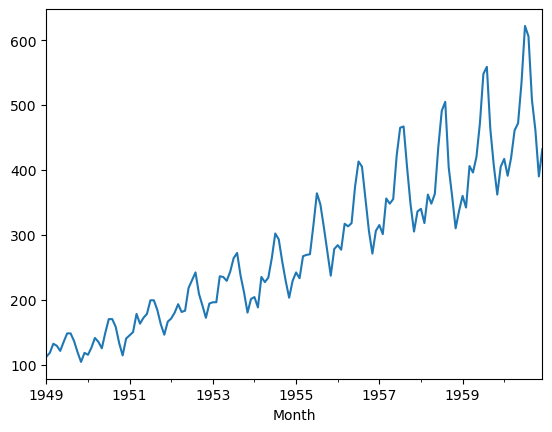

In [8]:
pasajeros['Thousands of Passengers'].plot();

Esta serie tiene tendencia positiva y componente estacional

In [9]:
## Estacionaria?
prueba_dfa = adfuller(pasajeros['Thousands of Passengers'])
pvalor = prueba_dfa[1]
pvalor.round(2)

0.99

No rechazamos H0, no es estacionaria

In [10]:
pasajeros['diff'] = pasajeros['Thousands of Passengers'].diff()
pasajeros

,Thousands of Passengers,diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [12]:
df_test1 = adfuller(pasajeros['diff'].dropna())
pvalue1 = df_test1[1]
pvalue1.round(3)

0.054

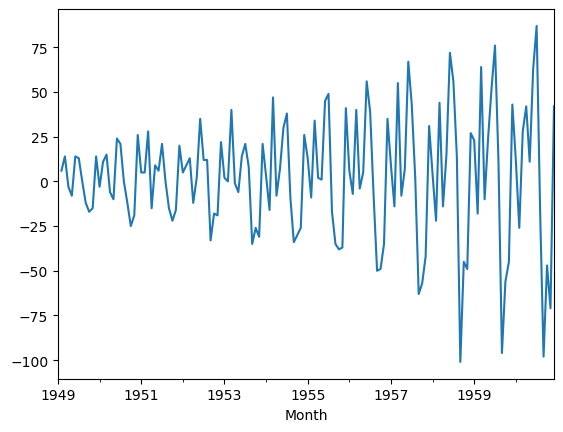

In [13]:
pasajeros['diff'].plot();

In [14]:
pasajeros['2das_diff'] = pasajeros['diff'].diff()
pasajeros

,Thousands of Passengers,diff,2das_diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


In [16]:
df_test2 = adfuller(pasajeros['2das_diff'].dropna())
pvalue2 = df_test2[1]
pvalue2.round(3)

0.0

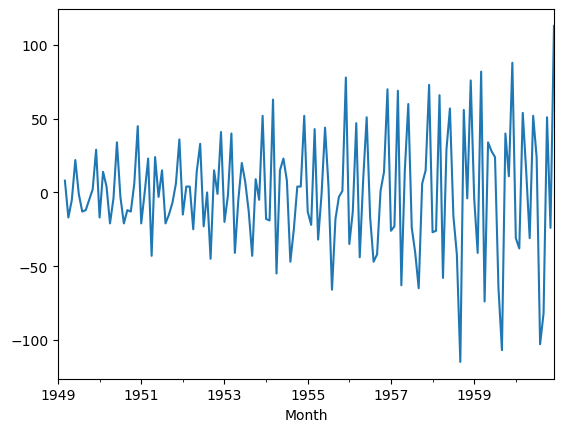

In [17]:
pasajeros['2das_diff'].plot();

## Rechazamos Ho, significa que las 2das dif del igae son estacionarias

* pasajeros I(2)

* primeras dif I(1)

* 2das dif I(0)

c:\Users\Dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


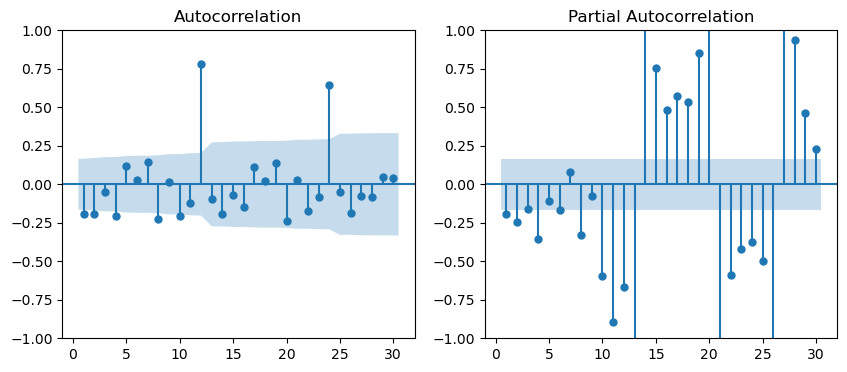

In [20]:
ig,ax=plt.subplots(1,2,figsize=(10,4))
plot_acf(pasajeros['2das_diff'].dropna(),zero=False,lags=30,ax=ax[0])
plot_pacf(pasajeros['2das_diff'].dropna(),zero=False,lags=30,ax=ax[1])
plt.show()

Esto nos confirma que es estacional

In [22]:

pm.auto_arima(pasajeros['Thousands of Passengers'], start_p=1, start_q=1,max_p=7,max_q=7,m=12,ic='aic' ,seasonal=True, start_Q=1, start_P=1, max_P=7,max_Q=7)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Autoarima nos sugiere SARIMA(0,1,1)(2,1,0,12)

In [23]:
## estimar modelo 
model= ARIMA(pasajeros['Thousands of Passengers'],order=(0,1,1), seasonal_order=(2,1,0,12))
results= model.fit()

In [24]:
## pronosticar
results.predict('1961-01-01','1963-12-01')


1961-01-01    451.347077
1961-02-01    427.102222
1961-03-01    463.382490
1961-04-01    499.705771
1961-05-01    514.035525
1961-06-01    571.851867
1961-07-01    661.310509
1961-08-01    648.081675
1961-09-01    551.284691
1961-10-01    501.068279
1961-11-01    434.052984
1961-12-01    479.233768
1962-01-01    495.569171
1962-02-01    469.578456
1962-03-01    497.955024
1962-04-01    544.916438
1962-05-01    556.350007
1962-06-01    616.910052
1962-07-01    708.165787
1962-08-01    689.435153
1962-09-01    592.107043
1962-10-01    544.008548
1962-11-01    471.532194
1962-12-01    516.127935
1963-01-01    534.240091
1963-02-01    508.800960
1963-03-01    539.738522
1963-04-01    584.297670
1963-05-01    596.726148
1963-06-01    655.955970
1963-07-01    747.458851
1963-08-01    729.939146
1963-09-01    632.906669
1963-10-01    583.931319
1963-11-01    512.892704
1963-12-01    558.168624
Freq: MS, Name: predicted_mean, dtype: float64

In [25]:
## pronosticar pasado
pasajeros['pronostico_sarima'] = results.predict()

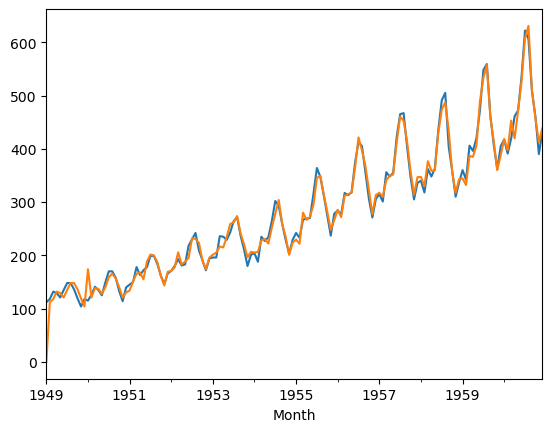

In [26]:
pasajeros['Thousands of Passengers'].plot()
pasajeros['pronostico_sarima'].plot();

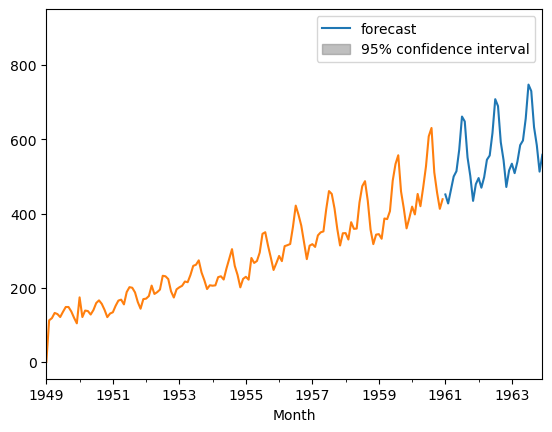

In [27]:
## Graficar pronostico
plot_predict(results,'1961-01-01','1963-12-01')
pasajeros['pronostico_sarima'].plot();